In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

In [2]:
import numpy as np
import pandas as pd
import scipy
import os
import segyio
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors
from so3d.utils.segy_reader import *
from so3d.utils.array_signal_plotter import plot_receiver_signals, freq_plot, freq_plot_tcut, plot_seismic,plot_shot_source_signal,plot_signal_mf_comparison
from so3d.utils.data_utils import get_shot_data, get_line_data, get_receivers_data,select_line_data_portion,match_filter
from so3d.utils.color_utils import redblue, redblue_cmap
import scipy.io

In [3]:
# read data
data_file = '../artifacts/raw/R1809SA8S299.sgy'
data, delta_t, textheader_output = read_segy(data_file)
source_signal = np.load('../artifacts/raw/source.npy')
standrad_source = scipy.io.loadmat('../artifacts/raw/source_signature.mat')

No of traces = 15315, No of samples per trace = 3200


In [4]:
s0 = standrad_source['peak1']
b1 = standrad_source['peak2']
signals = get_line_data(1,1,data)  
source = source_signal  

In [5]:
# filtered data : shape(3200,638)
mf= match_filter(signals,source)

Signal detected by receiver(s): [1]


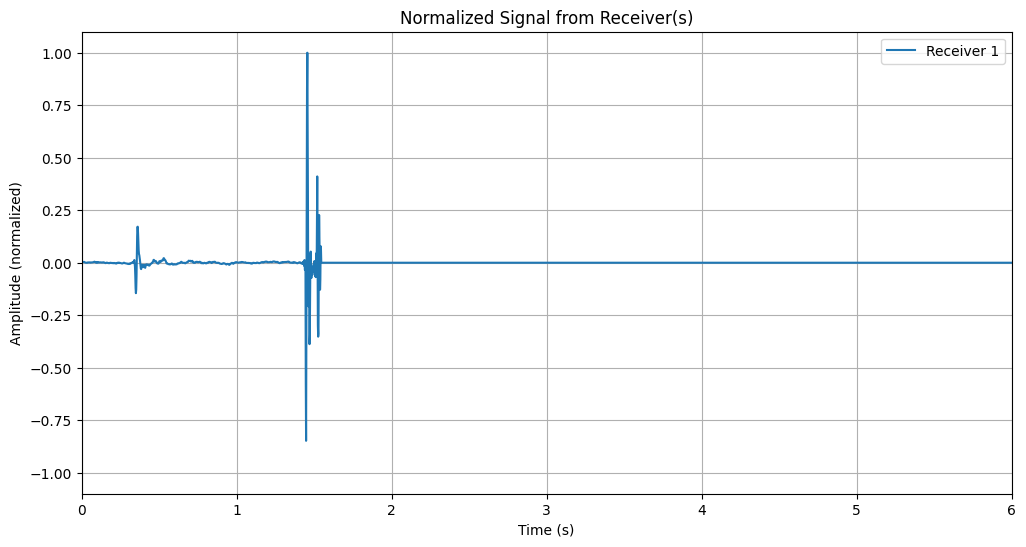

In [6]:
# filtered signal from 1st receiver (from line 1) 
plot_receiver_signals(signals[1],1,2)

Signal detected by receiver(s): [1]


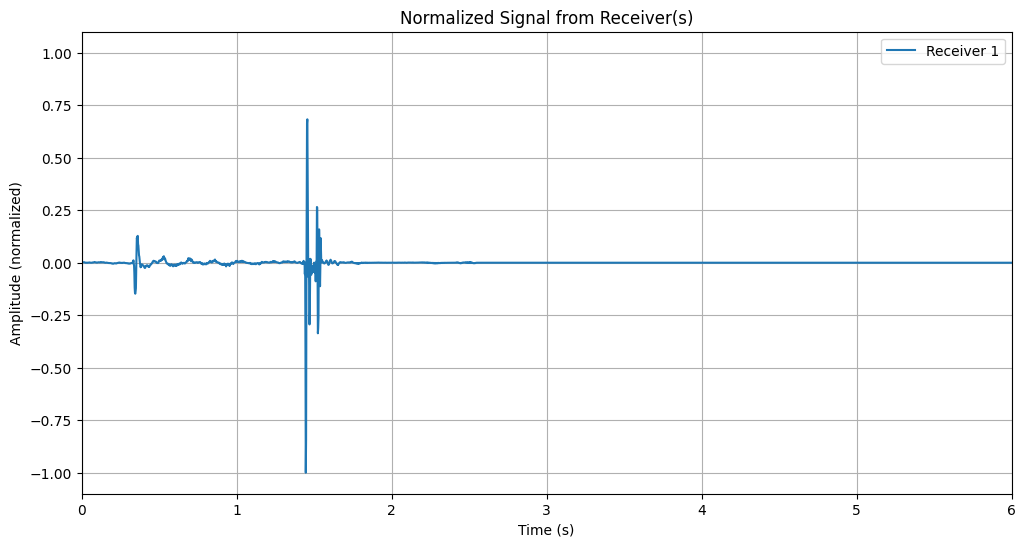

In [7]:
plot_receiver_signals(mf[1],1,2)

In [8]:
mf1= match_filter(signals,s0.squeeze())
mf2 = mf1 -0.15*match_filter(signals,b1.squeeze())

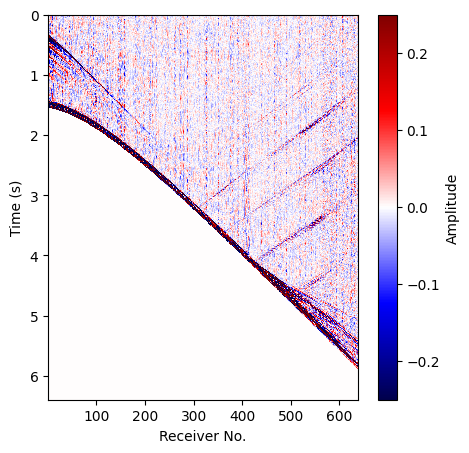

In [9]:
# plot_seismic( signals, receiver_range=(1, 100), time_range=(0, 1.5),fig_height=5, fig_width=5)
plot_seismic( signals,fig_height=5, fig_width=5)

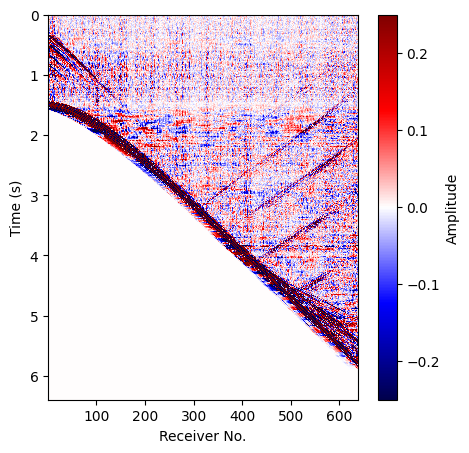

In [10]:
plot_seismic( mf2,fig_height=5, fig_width=5)

In [14]:

# Example of your original signal selection function
s1, t, R = select_line_data_portion(signals, 2, receiver_range=(0, 80), time_range=(0.1, 1.8))

In [18]:
# Transpose s1 for match filtering
s1 = s1.T

# Assuming s0 and b1 are defined or loaded here
mf_1 = match_filter(s1, s0.squeeze())
mf_2 = mf_1 - 0.15 * match_filter(s1, b1.squeeze())

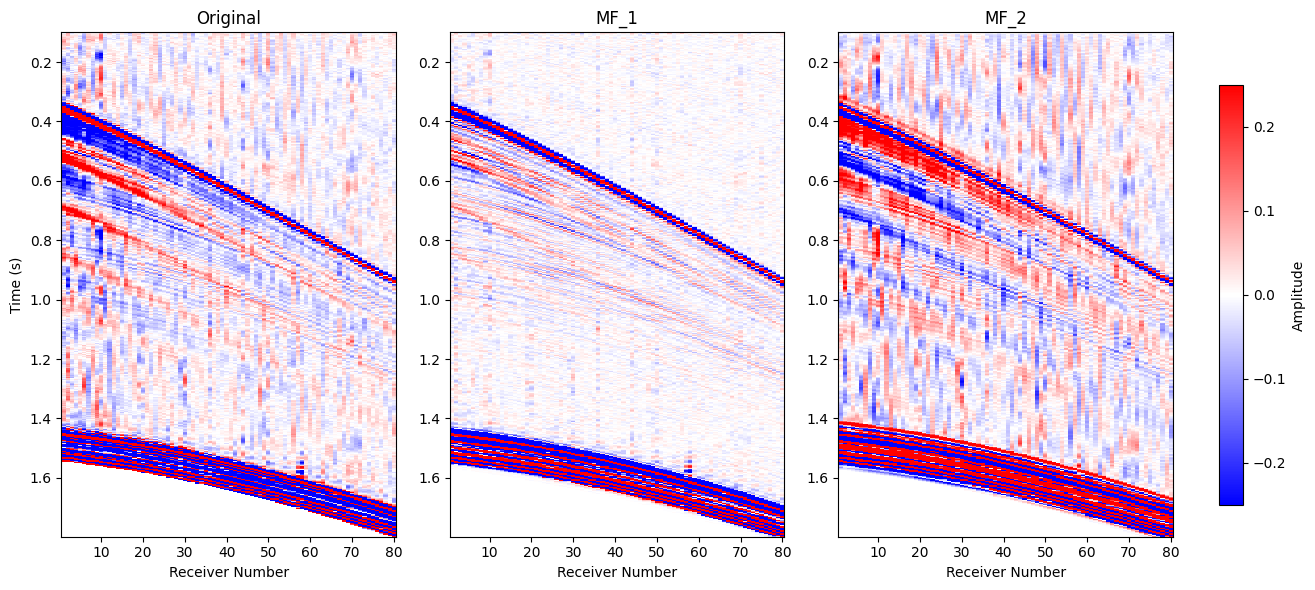

In [19]:
plot_signal_mf_comparison(s1, mf_1, mf_2, R, t)

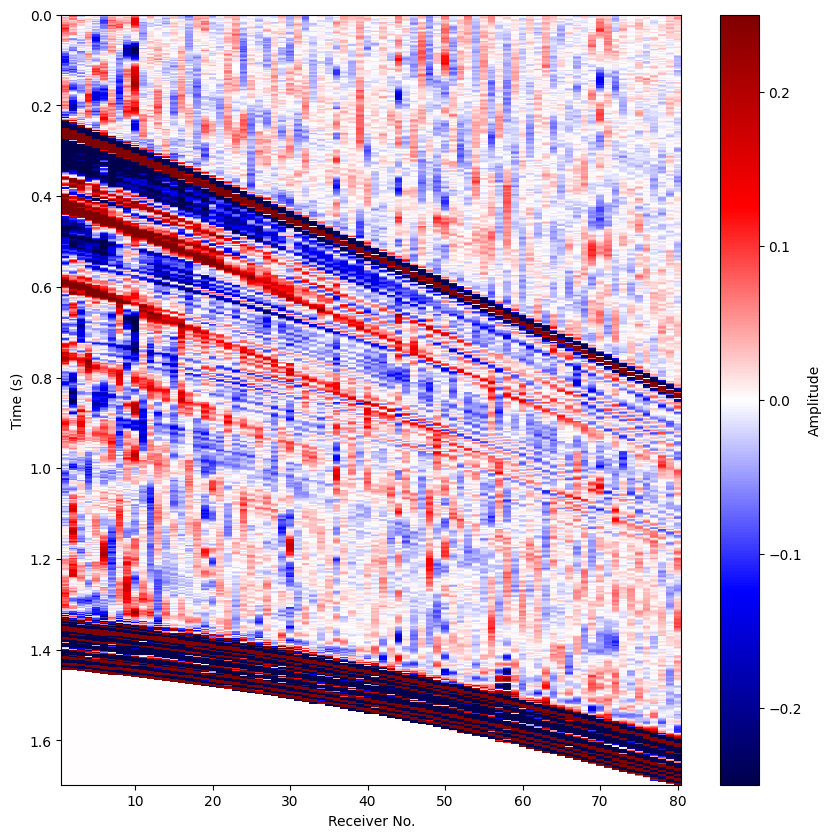

In [20]:

plot_seismic(s1.T,receiver_range=(0, 100), time_range=(0, 1.8), delta_t=2, fig_width=10, fig_height=10)
# plot_seismic(s1.T, delta_t=2, fig_width=10, fig_height=10)

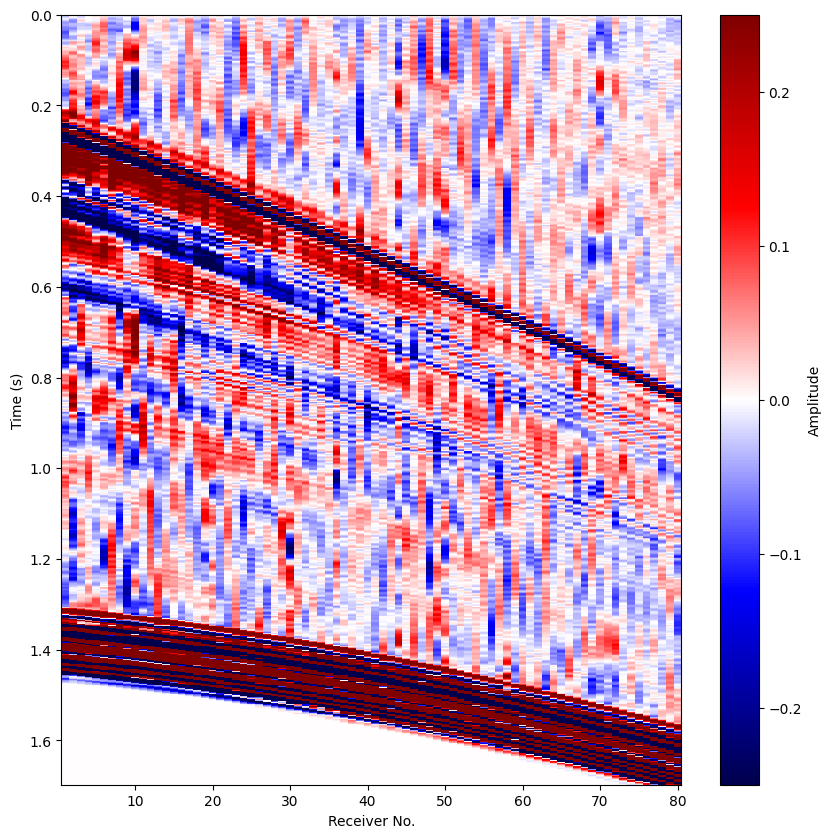

In [21]:
plot_seismic(mf_2.T,receiver_range=(0, 80), time_range=(0, 1.8), delta_t=2, fig_width=10, fig_height=10)